
Critical Difference Diagram for Loss

--- Plotting CD diagram for Loss ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [3.6666666666666665, 3.0, 4.0, 2.6666666666666665, 4.666666666666667, 3.0]
sortidx (raw): [3, 1, 5, 0, 2, 4]
sortidx (int): [3, 1, 5, 0, 2, 4]
nnames: ['15', '5', '30', '2', '10', '20']
cd: 4.352996290264711


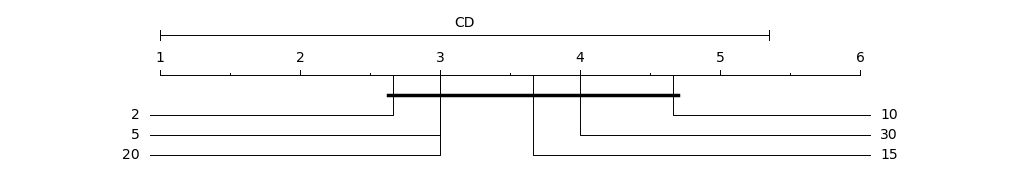


Critical Difference Diagram for Accuracy

--- Plotting CD diagram for Accuracy ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [1.0, 2.0, 4.0, 3.0, 5.0, 6.0]
sortidx (raw): [0, 1, 3, 2, 4, 5]
sortidx (int): [0, 1, 3, 2, 4, 5]
nnames: ['2', '5', '15', '10', '20', '30']
cd: 4.352996290264711


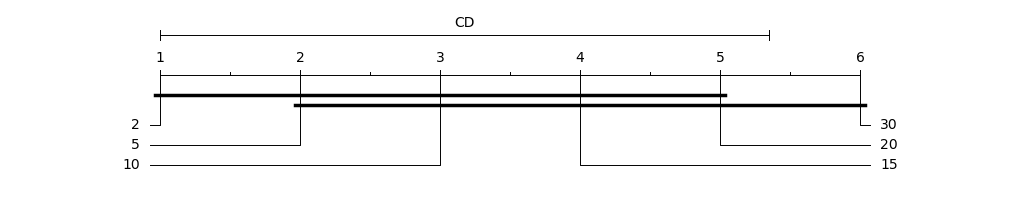


Critical Difference Diagram for Precision

--- Plotting CD diagram for Precision ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [1.0, 2.0, 4.666666666666667, 3.3333333333333335, 5.666666666666667, 4.333333333333333]
sortidx (raw): [0, 1, 3, 5, 2, 4]
sortidx (int): [0, 1, 3, 5, 2, 4]
nnames: ['2', '5', '15', '30', '10', '20']
cd: 4.352996290264711


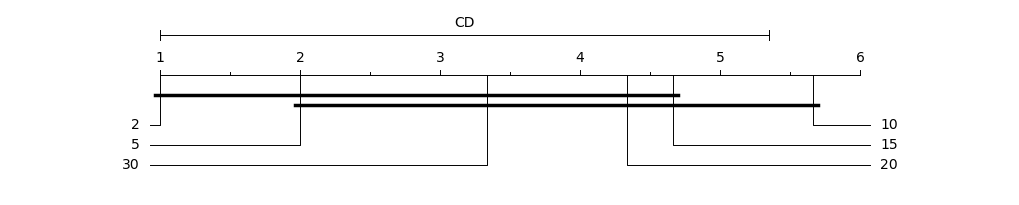


Critical Difference Diagram for Recall

--- Plotting CD diagram for Recall ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [1.6666666666666667, 3.0, 4.333333333333333, 4.0, 2.6666666666666665, 5.333333333333333]
sortidx (raw): [0, 4, 1, 3, 2, 5]
sortidx (int): [0, 4, 1, 3, 2, 5]
nnames: ['2', '20', '5', '15', '10', '30']
cd: 4.352996290264711


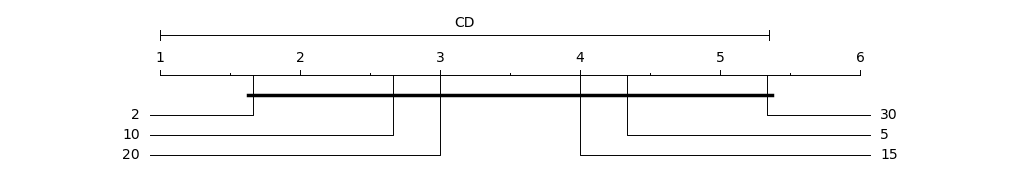


Critical Difference Diagram for F1-score

--- Plotting CD diagram for F1-score ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [1.0, 2.0, 4.0, 4.0, 5.0, 5.0]
sortidx (raw): [0, 1, 2, 3, 4, 5]
sortidx (int): [0, 1, 2, 3, 4, 5]
nnames: ['2', '5', '10', '15', '20', '30']
cd: 4.352996290264711


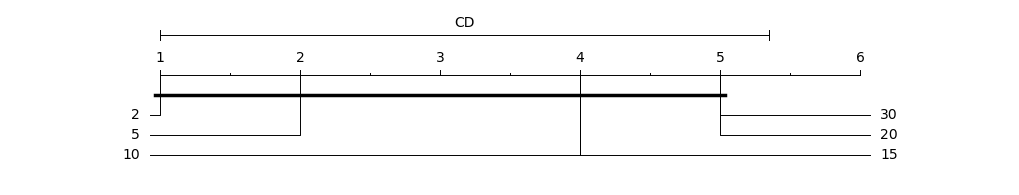


Critical Difference Diagram for Specificity

--- Plotting CD diagram for Specificity ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [1.0, 3.0, 4.0, 3.6666666666666665, 4.333333333333333, 5.0]
sortidx (raw): [0, 1, 3, 2, 4, 5]
sortidx (int): [0, 1, 3, 2, 4, 5]
nnames: ['2', '5', '15', '10', '20', '30']
cd: 4.352996290264711


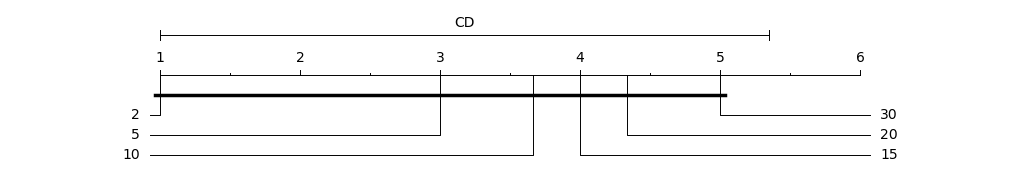

In [13]:
import json
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.stats import rankdata
import Orange
from Orange.evaluation import compute_CD, graph_ranks

# Función auxiliar para graficar forzando que los índices sean enteros y mostrando logs
def my_graph_ranks(avranks, cd, names, width=10, textspace=1.5, title=""):
    # Convertir avranks a lista de floats nativos
    avranks = list(map(float, avranks))
    print("avranks:", avranks)
    # Calcular índices ordenados basados en avranks
    sortidx = sorted(range(len(avranks)), key=lambda i: avranks[i])
    print("sortidx (raw):", sortidx)
    # Forzar que cada índice sea entero
    sortidx = [int(x) for x in sortidx]
    print("sortidx (int):", sortidx)
    # Extraer los nombres usando esos índices
    try:
        nnames = [names[x] for x in sortidx]
    except Exception as e:
        print("Error al indexar names con sortidx:", e)
        print("names:", names)
        print("sortidx:", sortidx)
        raise e
    print("nnames:", nnames)
    cd = float(cd)
    print("cd:", cd)
    # Llamar a graph_ranks de Orange con los parámetros en el orden correcto:
    # (avranks, names, cd, ...)
    graph_ranks(avranks, nnames, cd, width=width, textspace=textspace, title=title)

# Función para calcular y plotear el diagrama de diferencia crítica para una métrica
def plot_cd_for_metric(data, ws_names, metric_name, higher_is_better=True):
    """
    data: matriz de shape (n_replicates, n_window_sizes) – en este caso, cada fila es una arquitectura.
    ws_names: lista de nombres (strings) para cada tamaño de ventana (ej.: ["2", "5", "10", ...]).
    higher_is_better: True si para la métrica mayor es mejor; False si menor es mejor.
    """
    if higher_is_better:
        # Invertir la señal para que el valor mayor tenga ranking 1.
        ranks = np.array([rankdata(-row) for row in data])
    else:
        ranks = np.array([rankdata(row) for row in data])
    avg_ranks = np.mean(ranks, axis=0)
    avranks = avg_ranks.tolist()  # Convertir a lista de Python
    n_replicates = data.shape[0]
    cd = compute_CD(avranks, n_replicates, alpha="0.05", test="nemenyi")
    
    print(f"\n--- Plotting CD diagram for {metric_name} ---")
    print("Window names:", ws_names)
    my_graph_ranks(avranks, cd, ws_names, width=10, textspace=1.5,
                   title=f"Critical Difference Diagram for {metric_name}")
    plt.show()

# -------------------------------------------------------------------
# Cargar el archivo de resultados del Grupo 1
with open('experiment_results_group1.json', 'r') as f:
    results = json.load(f)

# Filtrar solo las configuraciones de interés:
# Se mantienen: splits=10, epochs=50, pad=False y resize=True
filtered = {}
for key, metrics in results.items():
    # Ejemplo de clave: group1_CNN_LF_splits_10_epochs_50_window_2_pad_False_resize_True
    m = re.match(r"group1_(.+?)_splits_(\d+)_epochs_(\d+)_window_(\d+)_pad_(True|False)_resize_(True|False)", key)
    if m:
        architecture, splits, epochs, window, pad, resize = m.groups()
        splits = int(splits)
        epochs = int(epochs)
        window = int(window)
        if splits == 10 and epochs == 50 and pad == "False" and resize == "True":
            if window not in filtered:
                filtered[window] = {}
            filtered[window][architecture] = metrics

# Se asume que para cada tamaño de ventana tendremos resultados para todas las arquitecturas
window_sizes = sorted(filtered.keys())
architectures = sorted({arch for ws in filtered for arch in filtered[ws].keys()})
metric_names = ["Loss", "Accuracy", "Precision", "Recall", "F1-score", "Specificity"]

# Construir una matriz para cada métrica: filas = arquitecturas, columnas = window sizes
metric_data = {metric: [] for metric in metric_names}
for arch in architectures:
    row = {metric: [] for metric in metric_names}
    for ws in window_sizes:
        if arch in filtered[ws]:
            for metric in metric_names:
                row[metric].append(filtered[ws][arch][metric])
        else:
            for metric in metric_names:
                row[metric].append(np.nan)
    for metric in metric_names:
        metric_data[metric].append(row[metric])
for metric in metric_data:
    metric_data[metric] = np.array(metric_data[metric])

# Especificar para cada métrica si mayor es mejor
metric_higher = {
    "Loss": False,
    "Accuracy": True,
    "Precision": True,
    "Recall": True,
    "F1-score": True,
    "Specificity": True
}

# Graficar el diagrama de diferencia crítica para cada métrica
for metric in metric_names:
    print(f"\nCritical Difference Diagram for {metric}")
    plot_cd_for_metric(metric_data[metric], [str(ws) for ws in window_sizes],
                       metric_name=metric, higher_is_better=metric_higher[metric])



==== Procesando resultados para cada grupo de épocas ====

Procesando resultados para epochs = 50
Window sizes para epochs = 50: [2, 5, 10, 15, 20, 30]

Procesando resultados para epochs = 100
Window sizes para epochs = 100: [2, 5, 10, 15, 20, 30]

Métrica: Loss

-- Epochs = 50 --
Friedman test for Loss (Epochs=50): statistic = 2.4286, p-value = 0.7872

--- Plotting CD diagram for Loss (Epochs=50) ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [3.6666666666666665, 3.0, 4.0, 2.6666666666666665, 4.666666666666667, 3.0]
sortidx (raw): [3, 1, 5, 0, 2, 4]
sortidx (int): [3, 1, 5, 0, 2, 4]
nnames: ['15', '5', '30', '2', '10', '20']
cd: 4.352996290264711


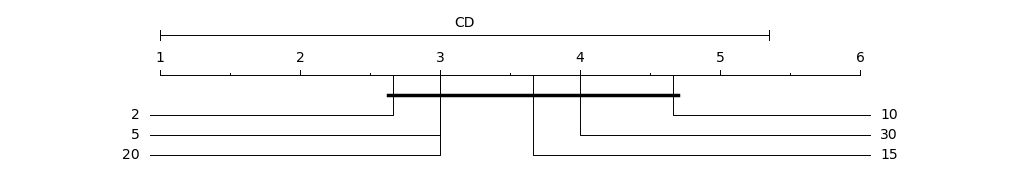


-- Epochs = 100 --
Friedman test for Loss (Epochs=100): statistic = 6.2381, p-value = 0.2837

--- Plotting CD diagram for Loss (Epochs=100) ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [4.333333333333333, 2.3333333333333335, 4.666666666666667, 3.0, 2.0, 4.666666666666667]
sortidx (raw): [4, 1, 3, 0, 2, 5]
sortidx (int): [4, 1, 3, 0, 2, 5]
nnames: ['20', '5', '15', '2', '10', '30']
cd: 4.352996290264711


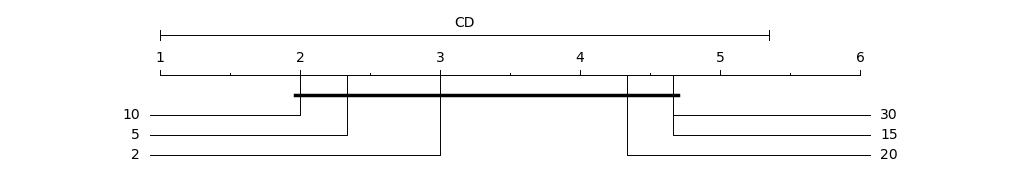


-- Combined (50+100) --
Friedman test for Loss (Epochs=Combined): statistic = 3.0000, p-value = 0.7000

--- Plotting CD diagram for Loss (Epochs=Combined) ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [4.0, 2.0, 4.0, 3.0, 4.0, 4.0]
sortidx (raw): [1, 3, 0, 2, 4, 5]
sortidx (int): [1, 3, 0, 2, 4, 5]
nnames: ['5', '15', '2', '10', '20', '30']
cd: 4.352996290264711


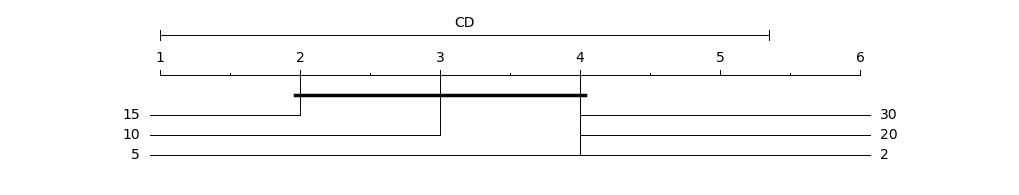


Métrica: Accuracy

-- Epochs = 50 --
Friedman test for Accuracy (Epochs=50): statistic = 15.0000, p-value = 0.0104

--- Plotting CD diagram for Accuracy (Epochs=50) ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [1.0, 2.0, 4.0, 3.0, 5.0, 6.0]
sortidx (raw): [0, 1, 3, 2, 4, 5]
sortidx (int): [0, 1, 3, 2, 4, 5]
nnames: ['2', '5', '15', '10', '20', '30']
cd: 4.352996290264711


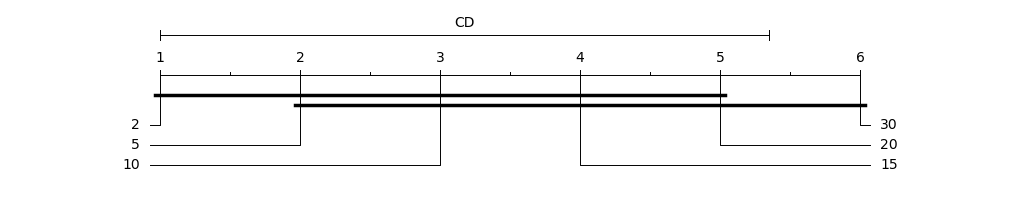


-- Epochs = 100 --
Friedman test for Accuracy (Epochs=100): statistic = 11.1905, p-value = 0.0477

--- Plotting CD diagram for Accuracy (Epochs=100) ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [1.0, 2.3333333333333335, 4.0, 4.0, 4.0, 5.666666666666667]
sortidx (raw): [0, 1, 2, 3, 4, 5]
sortidx (int): [0, 1, 2, 3, 4, 5]
nnames: ['2', '5', '10', '15', '20', '30']
cd: 4.352996290264711


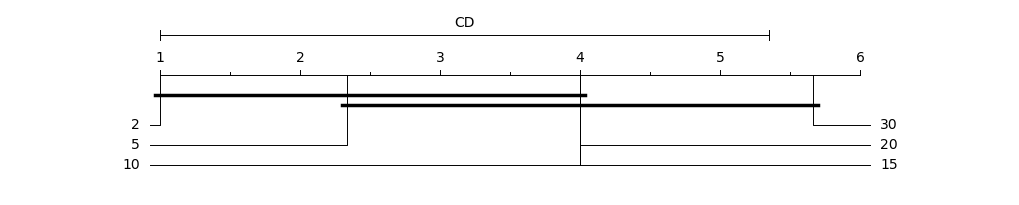


-- Combined (50+100) --
Friedman test for Accuracy (Epochs=Combined): statistic = 13.8571, p-value = 0.0165

--- Plotting CD diagram for Accuracy (Epochs=Combined) ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [1.0, 2.0, 3.6666666666666665, 3.6666666666666665, 4.666666666666667, 6.0]
sortidx (raw): [0, 1, 2, 3, 4, 5]
sortidx (int): [0, 1, 2, 3, 4, 5]
nnames: ['2', '5', '10', '15', '20', '30']
cd: 4.352996290264711


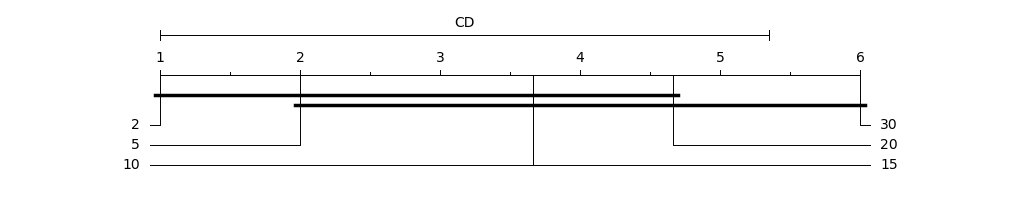


Métrica: Precision

-- Epochs = 50 --
Friedman test for Precision (Epochs=50): statistic = 13.0952, p-value = 0.0225

--- Plotting CD diagram for Precision (Epochs=50) ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [1.0, 2.0, 4.666666666666667, 3.3333333333333335, 5.666666666666667, 4.333333333333333]
sortidx (raw): [0, 1, 3, 5, 2, 4]
sortidx (int): [0, 1, 3, 5, 2, 4]
nnames: ['2', '5', '15', '30', '10', '20']
cd: 4.352996290264711


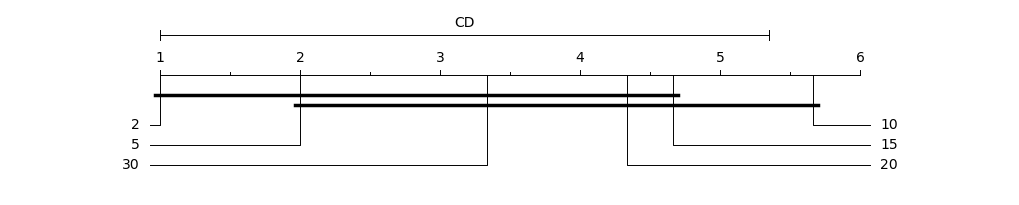


-- Epochs = 100 --
Friedman test for Precision (Epochs=100): statistic = 10.8095, p-value = 0.0553

--- Plotting CD diagram for Precision (Epochs=100) ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [1.0, 2.6666666666666665, 5.333333333333333, 3.3333333333333335, 5.0, 3.6666666666666665]
sortidx (raw): [0, 1, 3, 5, 4, 2]
sortidx (int): [0, 1, 3, 5, 4, 2]
nnames: ['2', '5', '15', '30', '20', '10']
cd: 4.352996290264711


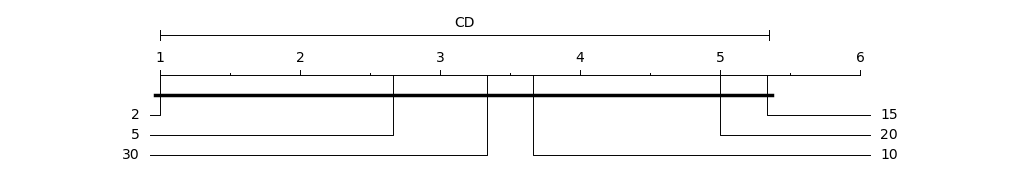


-- Combined (50+100) --
Friedman test for Precision (Epochs=Combined): statistic = 12.7143, p-value = 0.0262

--- Plotting CD diagram for Precision (Epochs=Combined) ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [1.0, 2.0, 4.666666666666667, 3.6666666666666665, 5.666666666666667, 4.0]
sortidx (raw): [0, 1, 3, 5, 2, 4]
sortidx (int): [0, 1, 3, 5, 2, 4]
nnames: ['2', '5', '15', '30', '10', '20']
cd: 4.352996290264711


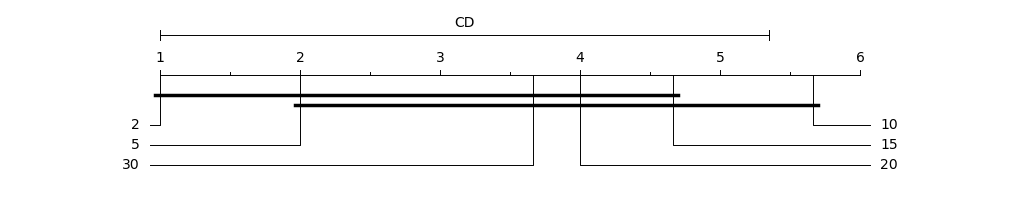


Métrica: Recall

-- Epochs = 50 --
Friedman test for Recall (Epochs=50): statistic = 7.3810, p-value = 0.1938

--- Plotting CD diagram for Recall (Epochs=50) ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [1.6666666666666667, 3.0, 4.333333333333333, 4.0, 2.6666666666666665, 5.333333333333333]
sortidx (raw): [0, 4, 1, 3, 2, 5]
sortidx (int): [0, 4, 1, 3, 2, 5]
nnames: ['2', '20', '5', '15', '10', '30']
cd: 4.352996290264711


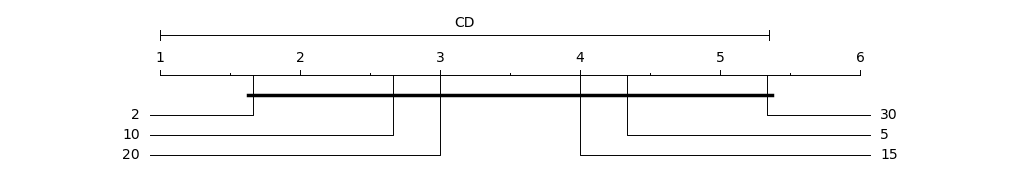


-- Epochs = 100 --
Friedman test for Recall (Epochs=100): statistic = 10.2381, p-value = 0.0688

--- Plotting CD diagram for Recall (Epochs=100) ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [1.0, 2.6666666666666665, 3.3333333333333335, 4.666666666666667, 4.0, 5.333333333333333]
sortidx (raw): [0, 1, 2, 4, 3, 5]
sortidx (int): [0, 1, 2, 4, 3, 5]
nnames: ['2', '5', '10', '20', '15', '30']
cd: 4.352996290264711


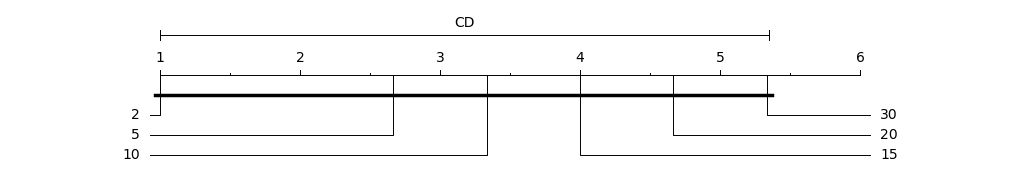


-- Combined (50+100) --
Friedman test for Recall (Epochs=Combined): statistic = 10.8095, p-value = 0.0553

--- Plotting CD diagram for Recall (Epochs=Combined) ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [1.0, 2.6666666666666665, 3.3333333333333335, 4.333333333333333, 4.0, 5.666666666666667]
sortidx (raw): [0, 1, 2, 4, 3, 5]
sortidx (int): [0, 1, 2, 4, 3, 5]
nnames: ['2', '5', '10', '20', '15', '30']
cd: 4.352996290264711


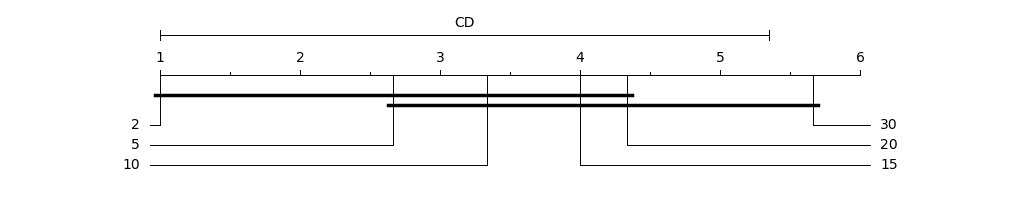


Métrica: F1-score

-- Epochs = 50 --
Friedman test for F1-score (Epochs=50): statistic = 11.5714, p-value = 0.0412

--- Plotting CD diagram for F1-score (Epochs=50) ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [1.0, 2.0, 4.0, 4.0, 5.0, 5.0]
sortidx (raw): [0, 1, 2, 3, 4, 5]
sortidx (int): [0, 1, 2, 3, 4, 5]
nnames: ['2', '5', '10', '15', '20', '30']
cd: 4.352996290264711


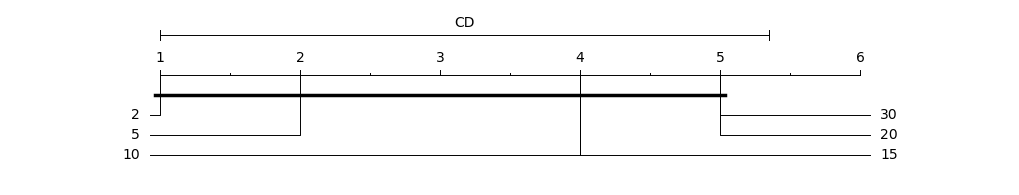


-- Epochs = 100 --
Friedman test for F1-score (Epochs=100): statistic = 9.8571, p-value = 0.0794

--- Plotting CD diagram for F1-score (Epochs=100) ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [1.0, 2.3333333333333335, 4.333333333333333, 4.333333333333333, 4.0, 5.0]
sortidx (raw): [0, 1, 4, 2, 3, 5]
sortidx (int): [0, 1, 4, 2, 3, 5]
nnames: ['2', '5', '20', '10', '15', '30']
cd: 4.352996290264711


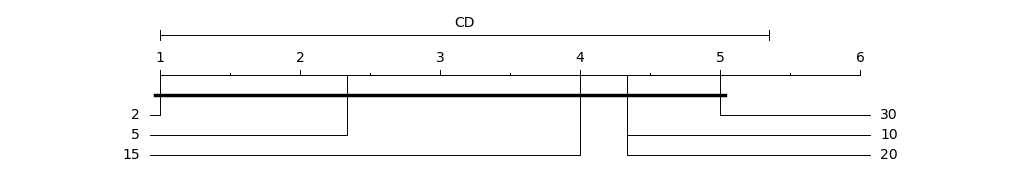


-- Combined (50+100) --
Friedman test for F1-score (Epochs=Combined): statistic = 12.7143, p-value = 0.0262

--- Plotting CD diagram for F1-score (Epochs=Combined) ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [1.0, 2.0, 3.6666666666666665, 4.0, 4.666666666666667, 5.666666666666667]
sortidx (raw): [0, 1, 2, 3, 4, 5]
sortidx (int): [0, 1, 2, 3, 4, 5]
nnames: ['2', '5', '10', '15', '20', '30']
cd: 4.352996290264711


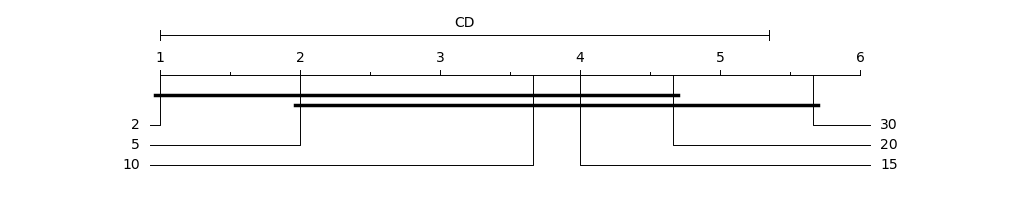


Métrica: Specificity

-- Epochs = 50 --
Friedman test for Specificity (Epochs=50): statistic = 8.3333, p-value = 0.1388

--- Plotting CD diagram for Specificity (Epochs=50) ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [1.0, 3.0, 4.0, 3.6666666666666665, 4.333333333333333, 5.0]
sortidx (raw): [0, 1, 3, 2, 4, 5]
sortidx (int): [0, 1, 3, 2, 4, 5]
nnames: ['2', '5', '15', '10', '20', '30']
cd: 4.352996290264711


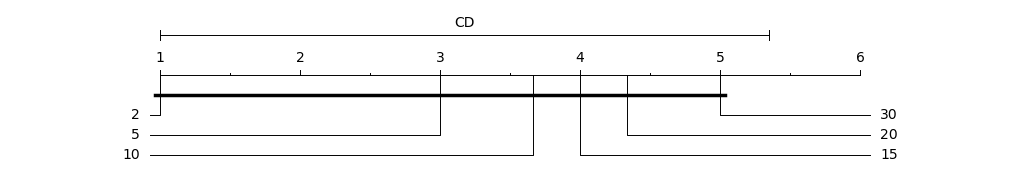


-- Epochs = 100 --
Friedman test for Specificity (Epochs=100): statistic = 14.2381, p-value = 0.0142

--- Plotting CD diagram for Specificity (Epochs=100) ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [1.0, 2.0, 5.666666666666667, 3.3333333333333335, 3.6666666666666665, 5.333333333333333]
sortidx (raw): [0, 1, 3, 4, 5, 2]
sortidx (int): [0, 1, 3, 4, 5, 2]
nnames: ['2', '5', '15', '20', '30', '10']
cd: 4.352996290264711


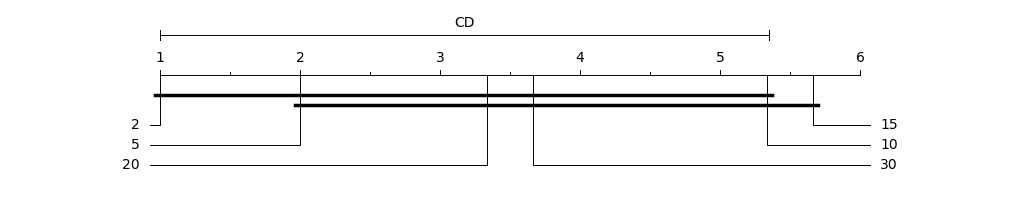


-- Combined (50+100) --
Friedman test for Specificity (Epochs=Combined): statistic = 12.5238, p-value = 0.0283

--- Plotting CD diagram for Specificity (Epochs=Combined) ---
Window names: ['2', '5', '10', '15', '20', '30']
avranks: [1.0, 2.0, 4.333333333333333, 3.6666666666666665, 4.333333333333333, 5.666666666666667]
sortidx (raw): [0, 1, 3, 2, 4, 5]
sortidx (int): [0, 1, 3, 2, 4, 5]
nnames: ['2', '5', '15', '10', '20', '30']
cd: 4.352996290264711


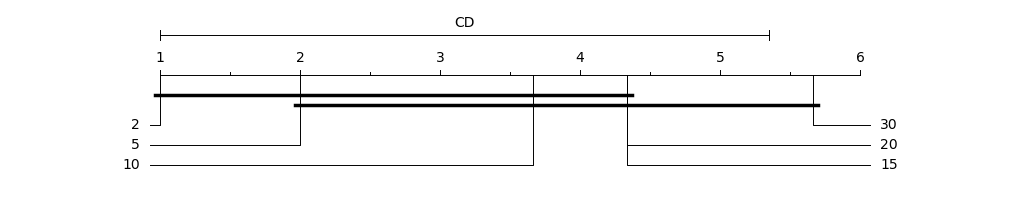

In [18]:
import json
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.stats import rankdata, friedmanchisquare
import Orange
from Orange.evaluation import compute_CD, graph_ranks

# Función auxiliar para graficar forzando índices enteros y mostrando logs
def my_graph_ranks(avranks, cd, names, width=10, textspace=1.5, title=""):
    # Convertir avranks a lista de floats nativos
    avranks = list(map(float, avranks))
    print("avranks:", avranks)
    # Calcular índices ordenados basados en avranks
    sortidx = sorted(range(len(avranks)), key=lambda i: avranks[i])
    print("sortidx (raw):", sortidx)
    # Forzar que cada índice sea entero
    sortidx = [int(x) for x in sortidx]
    print("sortidx (int):", sortidx)
    try:
        nnames = [names[x] for x in sortidx]
    except Exception as e:
        print("Error al indexar names con sortidx:", e)
        print("names:", names)
        print("sortidx:", sortidx)
        raise e
    print("nnames:", nnames)
    cd = float(cd)
    print("cd:", cd)
    # Llamar a graph_ranks con el orden correcto: avranks, names, cd, ...
    graph_ranks(avranks, nnames, cd, width=width, textspace=textspace, title=title)

# Función para calcular y plotear el diagrama CD para una métrica, e imprimir el p-value de Friedman
def plot_cd_for_metric(data, ws_names, metric_name, higher_is_better=True, epochs_val=None):
    """
    data: matriz de shape (n_replicates, n_window_sizes) – cada fila es una arquitectura.
    ws_names: lista de nombres (strings) para cada tamaño de ventana (ej.: ["2", "5", "10", ...]).
    higher_is_better: True si mayor es mejor; False si menor es mejor.
    epochs_val: valor de épocas (opcional) para incluir en el título.
    """
    if higher_is_better:
        ranks = np.array([rankdata(-row) for row in data])
    else:
        ranks = np.array([rankdata(row) for row in data])
    avg_ranks = np.mean(ranks, axis=0)
    avranks = avg_ranks.tolist()
    n_replicates = data.shape[0]
    cd = compute_CD(avranks, n_replicates, alpha="0.05", test="nemenyi")
    
    # Calcular el p-value de Friedman (cada columna es un grupo)
    friedman_stat, pvalue = friedmanchisquare(*[data[:, j] for j in range(data.shape[1])])
    print(f"Friedman test for {metric_name} (Epochs={epochs_val}): statistic = {friedman_stat:.4f}, p-value = {pvalue:.4f}")
    
    title_str = f"Critical Difference Diagram for {metric_name}"
    if epochs_val is not None:
        title_str += f" (Epochs={epochs_val})"
    print(f"\n--- Plotting CD diagram for {metric_name} (Epochs={epochs_val}) ---")
    print("Window names:", ws_names)
    my_graph_ranks(avranks, cd, ws_names, width=10, textspace=1.5, title=title_str)
    plt.show()

# -------------------------------------------------------------------
# Cargar el archivo de resultados del Grupo 1
with open('experiment_results_group1.json', 'r') as f:
    results = json.load(f)

# Valores de épocas a considerar
epochs_values = [50, 100]

# Filtrar y construir matrices para cada grupo de épocas
def build_metric_data_for_epochs(ep_value):
    filtered = {}
    for key, metrics in results.items():
        # Ejemplo: group1_CNN_LF_splits_10_epochs_50_window_2_pad_False_resize_True
        m = re.match(r"group1_(.+?)_splits_(\d+)_epochs_(\d+)_window_(\d+)_pad_(True|False)_resize_(True|False)", key)
        if m:
            architecture, splits, epochs_str, window, pad, resize = m.groups()
            splits = int(splits)
            epochs_val = int(epochs_str)
            window = int(window)
            if splits == 10 and epochs_val == ep_value and pad == "False" and resize == "True":
                if window not in filtered:
                    filtered[window] = {}
                filtered[window][architecture] = metrics
    if not filtered:
        print(f"No se encontraron resultados para epochs = {ep_value}")
        return None, None
    window_sizes = sorted(filtered.keys())
    architectures = sorted({arch for ws in filtered for arch in filtered[ws].keys()})
    metric_names = ["Loss", "Accuracy", "Precision", "Recall", "F1-score", "Specificity"]
    metric_data = {metric: [] for metric in metric_names}
    for arch in architectures:
        row = {metric: [] for metric in metric_names}
        for ws in window_sizes:
            if arch in filtered[ws]:
                for metric in metric_names:
                    row[metric].append(filtered[ws][arch][metric])
            else:
                for metric in metric_names:
                    row[metric].append(np.nan)
        for metric in metric_names:
            metric_data[metric].append(row[metric])
    for metric in metric_data:
        metric_data[metric] = np.array(metric_data[metric])
    return window_sizes, metric_data

print("\n==== Procesando resultados para cada grupo de épocas ====")
results_by_epoch = {}
for ep in epochs_values:
    print(f"\nProcesando resultados para epochs = {ep}")
    ws, mdata = build_metric_data_for_epochs(ep)
    if ws is not None:
        results_by_epoch[ep] = mdata
        print(f"Window sizes para epochs = {ep}: {ws}")

# Construir el grupo combinado (promediando resultados de 50 y 100 épocas)
combined_metric_data = {}
if 50 in results_by_epoch and 100 in results_by_epoch:
    # Suponemos que los tamaños de ventana son iguales para ambos grupos
    ws_combined, _ = build_metric_data_for_epochs(50)  # Tomamos el de 50
    metric_names = ["Loss", "Accuracy", "Precision", "Recall", "F1-score", "Specificity"]
    for metric in metric_names:
        data50 = results_by_epoch[50][metric]
        data100 = results_by_epoch[100][metric]
        # Promediamos ambas matrices (elemento a elemento)
        combined = (data50 + data100) / 2.0
        combined_metric_data[metric] = combined
    combined_group = ws_combined  # Los tamaños de ventana
else:
    print("No se encontraron ambos grupos de épocas para combinar.")

# Especificar para cada métrica si mayor es mejor
metric_higher = {
    "Loss": False,
    "Accuracy": True,
    "Precision": True,
    "Recall": True,
    "F1-score": True,
    "Specificity": True
}

# Ahora graficamos para cada métrica: tres diagramas (para ep=50, ep=100 y combinado)
for metric in metric_higher.keys():
    print(f"\n====================\nMétrica: {metric}")
    # Epocas 50
    if 50 in results_by_epoch:
        print(f"\n-- Epochs = 50 --")
        plot_cd_for_metric(results_by_epoch[50][metric], [str(ws) for ws in ws], 
                           metric_name=metric, higher_is_better=metric_higher[metric], epochs_val=50)
    # Epocas 100
    if 100 in results_by_epoch:
        print(f"\n-- Epochs = 100 --")
        ws_100, _ = build_metric_data_for_epochs(100)  # ws_100 debería ser igual a ws de 50
        plot_cd_for_metric(results_by_epoch[100][metric], [str(ws) for ws in ws_100], 
                           metric_name=metric, higher_is_better=metric_higher[metric], epochs_val=100)
    # Combinado
    if combined_metric_data.get(metric) is not None:
        print(f"\n-- Combined (50+100) --")
        plot_cd_for_metric(combined_metric_data[metric], [str(ws) for ws in combined_group], 
                           metric_name=metric, higher_is_better=metric_higher[metric], epochs_val="Combined")
